### Opinion Mining/ Celenium


Сегодня мы будем работать с видео с ютьюба, а именно анализировать оставленнгые под ним комменты. Ютьюб, Кинопоиск, сайт амазон и подобные вещи - это отличный источник для всякого oпинион майнинга и сентимент анализа, но если вы попробуете подступиться к ним через request, то они вас отвергнут и не дадут вам делать ничего без капчи.
Плюс, на сайтах типа ютьюба надо как-то прокручивать страницу вниз, чтобы обсасывать комменты, что тоже отдельная проблема.

 (Тут рассказ про дедос аттаки - капчу)

Тут нам поможет силениум -- простым языком, эта такая штука, которая позвыоляет вам заходить на сайт не как бот, а как человек и не ловить капчу на каждой странице

In [94]:
!pip install selenium

In [95]:
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

1. Для начала нужно скачать chromedriver (https://chromedriver.chromium.org/downloads) в рабочую папку: у вас появится архив с бинарным файлом внутри. Архив нужно будет распаковать, а путь к папке добавить в path. Можно пользоваться драйверами различных браузеров, здесь я оставляю ссылки на версию google chrome.
2. В начале скрипта мы создаем какую-либо переменную, в которую помещаем наш браузер.
Пр.: driver = webdriver.Chrome(<полный путь к бинарному файлу>)
3. Открыть страницу можно с помощью функции get. 
Прокрутить страницу можно с помощью кода внизу.
4. Находить различные элементы страницы можно с помощью ряда функций find_elements_by_<...> (см. документацию).
Чтобы понять, как найти какой-либо элемент на странице, нужно в веб-инспекторе в браузере посмотреть путь элемента. В гугл-хроме это можно сделать, например, так: Посмотреть -> Разработчикам -> Проверить элементы -> Навести стрелкой на нужный элемент.
5. Как только мы нашли нужный элемент, можно на него кликнуть функцией .click() или посмотреть текст функцией .text().
6. В конце программы нужно  закрыть, если открывалли как сверху и, конечно, как -то сохранить ваши данные



All the other modules are needed because Youtube comments are dynamically loaded, which means that they are only visible when you scroll down the page. So we want a loop that will:
Scroll down
Wait for comments to appear
Scrape the comments
Repeat for whatever range we want.

https://towardsdatascience.com/how-to-scrape-youtube-comments-with-python-61ff197115d4

In [ ]:
data=[]

with Chrome(executable_path=r'C:\Users\avorl\Downloads\chromedriver_win32\chromedriver.exe') as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://www.youtube.com/watch?v=kuhhT_cBtFU&t=2s")

    for item in range(200): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

        for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
            data.append(comment.text)
            #print(comment.text)

WebDriverException: ignored

In [2]:
from google.colab import files

uploaded = files.upload()


Saving my.csv to my.csv


In [109]:
import pandas
a = pandas.read_csv('my.csv')

материал --- что за видео? как собрали 
 https://www.youtube.com/watch?v=kuhhT_cBtFU&t=2s

In [110]:
import pandas as pd
import re, string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob

sw = stopwords.words('english')
#The function
def clean_text(text):
  if type(text) == str:
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [111]:
a['0'] = a['0'].apply(lambda x: clean_text(x))

In [112]:
a

,Unnamed: 0,0
0,0,"[ru, yoularu, newsbodycam, video, shows, momen..."
1,1,"[bodycam, video, released, atlanta, police, de..."
2,2,"[white, officers, black, man, im, sick, media,..."
3,3,"[fact, said, white, officers, black, man, prob..."
4,4,"[always, wonder, cnn, never, shows, whole, cli..."
...,...,...
6067,6067,"[unbelievablehe, obviously, intoxicatedhe, obv..."
6068,6068,"[tips, dont, want, get, shot, dont, run, stop,..."
6069,6069,"[local, prosecutor, explain, exactly, sees]"
6070,6070,"[dont, inderstand, taking, taser, gun, running..."


In [100]:
lemmatizer = WordNetLemmatizer()



In [113]:
def lem(text):
    if type(text) == str:
      text = [lemmatizer.lemmatize(t) for t in text.split()]
      text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text
a['0'] = a['0'].apply(lambda x: lem(x))

In [114]:
a['0'][1458]

['yes', 'carefully', 'leave', 'part', 'took', 'taser', 'police']

In [115]:
a

,Unnamed: 0,0
0,0,"[ru, yoularu, newsbodycam, video, shows, momen..."
1,1,"[bodycam, video, released, atlanta, police, de..."
2,2,"[white, officers, black, man, im, sick, media,..."
3,3,"[fact, said, white, officers, black, man, prob..."
4,4,"[always, wonder, cnn, never, shows, whole, cli..."
...,...,...
6067,6067,"[unbelievablehe, obviously, intoxicatedhe, obv..."
6068,6068,"[tips, dont, want, get, shot, dont, run, stop,..."
6069,6069,"[local, prosecutor, explain, exactly, sees]"
6070,6070,"[dont, inderstand, taking, taser, gun, running..."


Как померить их мнение?

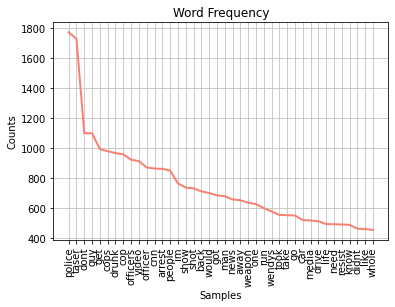

In [118]:
#Your code here - freq

In [ ]:
#bigram freq

In [ ]:
#trigram freq

TextBlob

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [122]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment
#Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)
#testimonial.sentiment.polarity
#0.39166666666666666

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

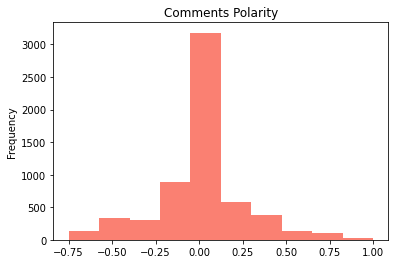

In [123]:
a['0'] = [str(thing) for thing in a['0']]
sentiment = []
for i in range(len(a)):
    blob = TextBlob(a['0'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
a['0']=sentiment
#Plot
a['0'].plot.hist(color='salmon', title='Comments Polarity')

People did not appreciate that CNN left out the clip of Rayshard Brooks firing the taser, calling the video and CNN “fake news” quite often.
Rayshard Brooks actions seem to be viewed negatively here, with many mentionning that he was drunk driving, resisted arrest, tried to run away and fired a taser.
The conditions in which the shooting happened seem to be deemed more “acceptable” by the viewers of the video, which would explain the neutral polarity.
Surprisingly few mentions of police brutality or racism.

 ## ОТВЕТЫ

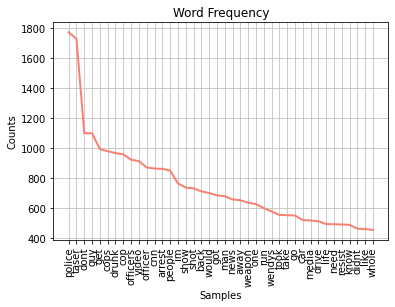

In [116]:
#From lists of comments to a single list containing all words      
all_words=[]        
for i in range(len(a)):
   if type(a['0'][i]) != float:
    for w in a['0'][i]:
     if type(w) == str:
      all_words.append(w)
#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(40, color='salmon', title='Word Frequency')

In [119]:
sorted(nlp_words, key=nlp_words.get, reverse=True)

['police',
 'taser',
 'dont',
 'guy',
 'get',
 'cops',
 'drunk',
 'cop',
 'officers',
 'video',
 'officer',
 'cnn',
 'arrest',
 'people',
 'im',
 'show',
 'shot',
 'back',
 'would',
 'got',
 'man',
 'news',
 'away',
 'weapon',
 'one',
 'run',
 'wendys',
 'took',
 'take',
 'go',
 'car',
 'media',
 'drive',
 'life',
 'need',
 'resist',
 'know',
 'didnt',
 'like',
 'whole',
 'even',
 'could',
 'brooks',
 'going',
 'fired',
 'let',
 'see',
 'good',
 'still',
 'use',
 'bad',
 'fight',
 'time',
 'deadly',
 'tried',
 'think',
 'shooting',
 'footage',
 'lot',
 'gun',
 'part',
 'driving',
 'us',
 'chance',
 'told',
 'way',
 'running',
 'rayshard',
 'make',
 'call',
 'never',
 'full',
 'clip',
 'home',
 'resisting',
 'trying',
 'person',
 'point',
 'white',
 'also',
 'come',
 'said',
 'kill',
 'passed',
 'want',
 'killed',
 'na',
 'dui',
 'shoot',
 'happened',
 'hell',
 'cant',
 'really',
 'knew',
 'happen',
 'arrested',
 'right',
 'atlanta',
 'maybe',
 'suspect',
 'chose',
 'america',
 'cut',
 

The word racism was said 17 times, the word racist 21 times and the word brutality only 6 times.
The word criminal was written 40 times.

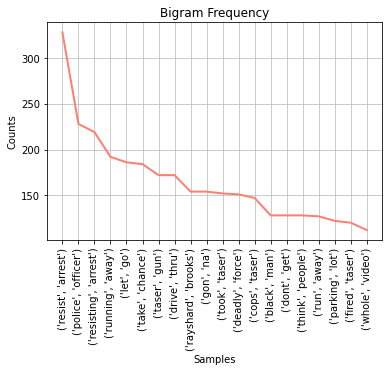

In [120]:
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

In [93]:
sorted(words_2, key=words_2.get, reverse=True)


[('white', 'officers', 'black'),
 ('officers', 'black', 'man'),
 ('moments', 'leading', 'fatal'),
 ('chose', 'resist', 'arrest'),
 ('life', 'use', 'deadly'),
 ('part', 'guy', 'stole'),
 ('told', 'pull', 'parking'),
 ('lets', 'burn', 'wendys'),
 ('part', 'took', 'taser'),
 ('point', 'weapon', 'cop'),
 ('leading', 'fatal', 'shooting'),
 ('taser', 'gun', 'police'),
 ('suspicion', 'driver', 'drunk'),
 ('driver', 'drunk', 'police'),
 ('drunk', 'police', 'makes'),
 ('police', 'makes', 'test'),
 ('makes', 'test', 'driver'),
 ('test', 'driver', 'fails'),
 ('steal', 'cops', 'taser'),
 ('likes', 'dislike', 'manipulated'),
 ('dislike', 'manipulated', 'cnn'),
 ('manipulated', 'cnn', 'boards'),
 ('guy', 'fired', 'taser'),
 ('call', 'someone', 'pick'),
 ('resist', 'arrest', 'take'),
 ('bodycam', 'video', 'released'),
 ('video', 'released', 'atlanta'),
 ('released', 'atlanta', 'police'),
 ('atlanta', 'police', 'department'),
 ('police', 'department', 'show'),
 ('department', 'show', 'moments'),
 ('sh

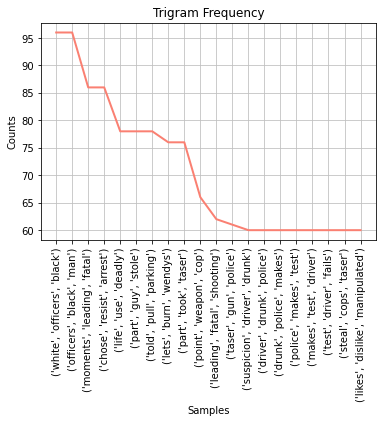

In [86]:
trigrm = list(nltk.trigrams(all_words))
words_2 = nltk.FreqDist(trigrm)
words_2.plot(20, color='salmon', title='Trigram Frequency')

In [88]:
words_2

FreqDist({('ru', 'yoularu', 'newsbodycam'): 1,
          ('yoularu', 'newsbodycam', 'video'): 1,
          ('newsbodycam', 'video', 'shows'): 24,
          ('video', 'shows', 'moments'): 38,
          ('shows', 'moments', 'leading'): 38,
          ('moments', 'leading', 'fatal'): 86,
          ('leading', 'fatal', 'bodycam'): 24,
          ('fatal', 'bodycam', 'video'): 24,
          ('bodycam', 'video', 'released'): 48,
          ('video', 'released', 'atlanta'): 48,
          ('released', 'atlanta', 'police'): 48,
          ('atlanta', 'police', 'department'): 48,
          ('police', 'department', 'show'): 48,
          ('department', 'show', 'moments'): 48,
          ('show', 'moments', 'leading'): 48,
          ('leading', 'fatal', 'shooting'): 62,
          ('fatal', 'shooting', 'rayshard'): 48,
          ('shooting', 'rayshard', 'white'): 24,
          ('rayshard', 'white', 'officers'): 24,
          ('white', 'officers', 'black'): 96,
          ('officers', 'black', 'man'): 96,